# Data pre-processing

Import packages

In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from itertools import chain
%matplotlib inline

In [2]:
# set the base directory
base_dir = Path(os.path.abspath('')).parent
os.chdir(base_dir)
print("base directory:", base_dir)

base directory: /home/jespeols/coding/GitHub_local/ARFusion


## NCBI

In [3]:
NCBI_data = pd.read_csv('data/NCBI/AMR_Ecoli_Shigella_20231005.tsv', sep='\t', low_memory=False)
print("NCBI data shape:", NCBI_data.shape)
print(f"NCBI number of samples: {NCBI_data.shape[0]:,}")

NCBI data shape: (340922, 66)
NCBI number of samples: 340,922


In [4]:
print("NCBI data columns:", NCBI_data.columns)

NCBI data columns: Index(['#label', 'FDA_lab_id', 'HHS_region', 'IFSAC_category', 'LibraryLayout',
       'PFGE_PrimaryEnzyme_pattern', 'PFGE_SecondaryEnzyme_pattern',
       'Platform', 'Run', 'asm_acc', 'asm_level', 'asm_stats_contig_n50',
       'asm_stats_length_bp', 'asm_stats_n_contig', 'assembly_method',
       'attribute_package', 'bioproject_acc', 'bioproject_center',
       'biosample_acc', 'isolate_identifiers', 'collected_by',
       'collection_date', 'epi_type', 'fullasm_id', 'geo_loc_name', 'host',
       'host_disease', 'isolation_source', 'lat_lon', 'ontological_term',
       'outbreak', 'sample_name', 'scientific_name', 'serovar', 'source_type',
       'species_taxid', 'sra_center', 'sra_release_date', 'strain',
       'sequenced_by', 'project_name', 'target_acc', 'target_creation_date',
       'taxid', 'wgs_acc_prefix', 'wgs_master_acc', 'minsame', 'mindiff',
       'computed_types', 'number_drugs_resistant', 'number_drugs_intermediate',
       'number_drugs_suscepti

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
NCBI_data.head()

,#label,FDA_lab_id,HHS_region,IFSAC_category,LibraryLayout,PFGE_PrimaryEnzyme_pattern,PFGE_SecondaryEnzyme_pattern,Platform,Run,asm_acc,asm_level,asm_stats_contig_n50,asm_stats_length_bp,asm_stats_n_contig,assembly_method,attribute_package,bioproject_acc,bioproject_center,biosample_acc,isolate_identifiers,collected_by,collection_date,epi_type,fullasm_id,geo_loc_name,host,host_disease,isolation_source,lat_lon,ontological_term,outbreak,sample_name,scientific_name,serovar,source_type,species_taxid,sra_center,sra_release_date,strain,sequenced_by,project_name,target_acc,target_creation_date,taxid,wgs_acc_prefix,wgs_master_acc,minsame,mindiff,computed_types,number_drugs_resistant,number_drugs_intermediate,number_drugs_susceptible,number_drugs_tested,number_amr_genes,number_core_amr_genes,AST_phenotypes,AMR_genotypes,AMR_genotypes_core,number_stress_genes,stress_genotypes,number_virulence_genes,virulence_genotypes,amrfinder_version,refgene_db_version,amrfinder_analysis_type,amrfinder_applied
0,PDT000002365.3|SAMN02368173|GCA_012802165.1|Escherichia coli||ESC0165|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060511,GCA_012802165.1,Contig,134039,4718827,88,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368173,"BCW_2912,""CFSAN005754"",""ESC0165"",""SRS519863""",FDA,NaN,clinical,19221148.0,USA,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2912,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0165,NaN,NaN,PDT000002365.3,2015-09-14,562,DABDQO,DABDQO000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"emrE,ymgB",3,"astA,espX1=PARTIAL,fdeC",3.6.7,2020-03-20.1,COMBINED,1
1,PDT000002366.3|SAMN02368174|GCA_012802195.1|Escherichia coli||ESC0167|Pathogen: environmental/food/other,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060510,GCA_012802195.1,Contig,73843,4931067,157,SKESA v. 2.2,Pathogen: environmental/food/other,PRJNA203445,University of California at Davis,SAMN02368174,"BCW_2914,""CFSAN005756"",""ESC0167"",""SRS519864""",FDA,NaN,environmental/other,19221188.0,USA,NaN,NaN,dog,NaN,NaN,NaN,BCW_2914,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0167,NaN,NaN,PDT000002366.3,2015-09-14,562,DABDQN,DABDQN000000000.1,NaN,NaN,NaN,0,0,0,0,6,3,NaN,"aadA1,acrF,blaEC,mdtM,sul1,tet(A)","aadA1,sul1,tet(A)",9,"merA=HMM,merC,merD=HMM,merE=HMM,merP,merR,merT,qacEdelta1,ymgB",1,espX1=PARTIAL,3.6.7,2020-03-20.1,COMBINED,1
2,PDT000002367.3|SAMN02368180|GCA_012802235.1|Escherichia coli||ESC0176|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060509,GCA_012802235.1,Contig,81293,5045269,220,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368180,"BCW_2923,""CFSAN005765"",""ESC0176"",""SRS519865""",FDA,NaN,clinical,19221208.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2923,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0176,NaN,NaN,PDT000002367.3,2015-09-14,562,DABDQR,DABDQR000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"emrE,ymgB",5,"espX1=PARTIAL,fdeC,iha,mchB,mchF",3.6.7,2020-03-20.1,COMBINED,1
3,PDT000002368.3|SAMN02368181|GCA_012802275.1|Escherichia coli||ESC0178|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060508,GCA_012802275.1,Contig,85880,4922402,145,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368181,"BCW_2925,""CFSAN005767"",""ESC0178"",""SRS519866""",FDA,NaN,clinical,19221248.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2925,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0178,NaN,NaN,PDT000002368.3,2015-09-14,562,DABDQQ,DABDQQ000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,25,"emrE,hdeD-GI,hsp20,kefB-GI,pcoA,pcoB,pcoC,pcoD,pcoE,pcoR,pcoS,psi-GI,shsP,silA,silB,silC,silE,silF,silP,silR,silS,trxLHR,yfdX1,yfdX2,ymgB",2,"fdeC,sslE=HMM",3.6.7,2020-03-20.1,COMBINED,1
4,PDT000002369.3|SAMN02368184|GCA_012802315.1|Escherichia coli||ESC0182|Pathogen:

### Some data exploration

In [6]:
explore_columns = ['collection_date', 'geo_loc_name', 'host', 'scientific_name',
                   'AST_phenotypes', 'AMR_genotypes_core', 'AMR_genotypes',] 

df_explore = NCBI_data[explore_columns]
df_explore.head()

,collection_date,geo_loc_name,host,scientific_name,AST_phenotypes,AMR_genotypes_core,AMR_genotypes
0,NaN,USA,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
1,NaN,USA,NaN,Escherichia coli,NaN,"aadA1,sul1,tet(A)","aadA1,acrF,blaEC,mdtM,sul1,tet(A)"
2,NaN,Sweden,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
3,NaN,Sweden,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
4,NaN,USA:WA,NaN,Escherichia coli,NaN,"aph(3'')-Ib,aph(6)-Id,sul2,tet(A)","acrF,aph(3'')-Ib,aph(6)-Id,blaEC,mdtM,sul2,tet(A)"


In [7]:
print("Basic information about the data:")
num_samples = df_explore.shape[0]
num_pheno = df_explore['AST_phenotypes'].count()
num_genotype = df_explore['AMR_genotypes_core'].count()

print(f"Number of samples: {num_samples:,}")
print(f"Number of samples with phenotype info: {num_pheno:,} ({num_pheno/num_samples:.2%})")
print(f"Number of samples with genotype info: {num_genotype:,} ({num_genotype/num_samples:.2%})")

df_overlap = df_explore[df_explore['AMR_genotypes_core'].notnull() & df_explore['AST_phenotypes'].notnull()]
num_overlap_samples = df_overlap.shape[0]
print(f"Number of samples with both phenotype and genotype info: {num_overlap_samples:,}\
 ({num_overlap_samples/num_samples:.2%})")

df_neither = df_explore[df_explore['AMR_genotypes_core'].isnull() & df_explore['AST_phenotypes'].isnull()]
num_neither_samples = df_neither.shape[0]
print(f"Number of samples with neither phenotype nor genotype info: {num_neither_samples:,}\
 ({num_neither_samples/num_samples:.2%})")

Basic information about the data:
Number of samples: 340,922
Number of samples with phenotype info: 6,642 (1.95%)
Number of samples with genotype info: 280,966 (82.41%)
Number of samples with both phenotype and genotype info: 5,678 (1.67%)
Number of samples with neither phenotype nor genotype info: 58,992 (17.30%)


Explore the genotype data

#### Isolate genotype data for parsing  
Note: This keeps the index of the orginal dataset

In [8]:
dataset_columns = ['collection_date', 'geo_loc_name', 'AMR_genotypes_core']
df_geno = df_explore[df_explore['AMR_genotypes_core'].notnull()]
num_geno_samples = df_geno.shape[0]
print(f"Number of samples with genotype info: {num_geno_samples:,} ({num_geno_samples/num_samples:.2%})")
df_geno = df_geno[dataset_columns]
df_geno.head()

Number of samples with genotype info: 280,966 (82.41%)


,collection_date,geo_loc_name,AMR_genotypes_core
1,NaN,USA,"aadA1,sul1,tet(A)"
4,NaN,USA:WA,"aph(3'')-Ib,aph(6)-Id,sul2,tet(A)"
6,NaN,Sweden,"cyaA_S352T=POINT,uhpT_E350Q=POINT"
8,NaN,USA:WA,parE_D475E=POINT
9,NaN,USA:WA,uhpT_E350Q=POINT


**Geo_loc_name**

*not determined*, *not collected*, *not provided*, *Not Provided* -> *NaN*

In [9]:
# set column as string type
alternative_nan = ['not determined', 'not collected', 'not provided', 'Not Provided',
                   'OUTPATIENT', 'Not collected', 'Not Collected', 'not available']
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].replace(alternative_nan, np.nan) 
# df_geno['geo_loc_name'].fillna('unknown', inplace=True) # replace NaN with 'unknown', Note: won't function as NaN

Remove regional info, after : (colon) or , (comma)

In [10]:
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].str.split(',').str[0]
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].str.split(':').str[0] 
df_geno.rename(columns={'geo_loc_name': 'country'}, inplace=True)

Check distribution of countries, if they constitute more than 0.05% of total samples

Number of unique countries: 153
Number of countries with frequency > 0.5%: 18
Share of unknown samples: (21.09%)


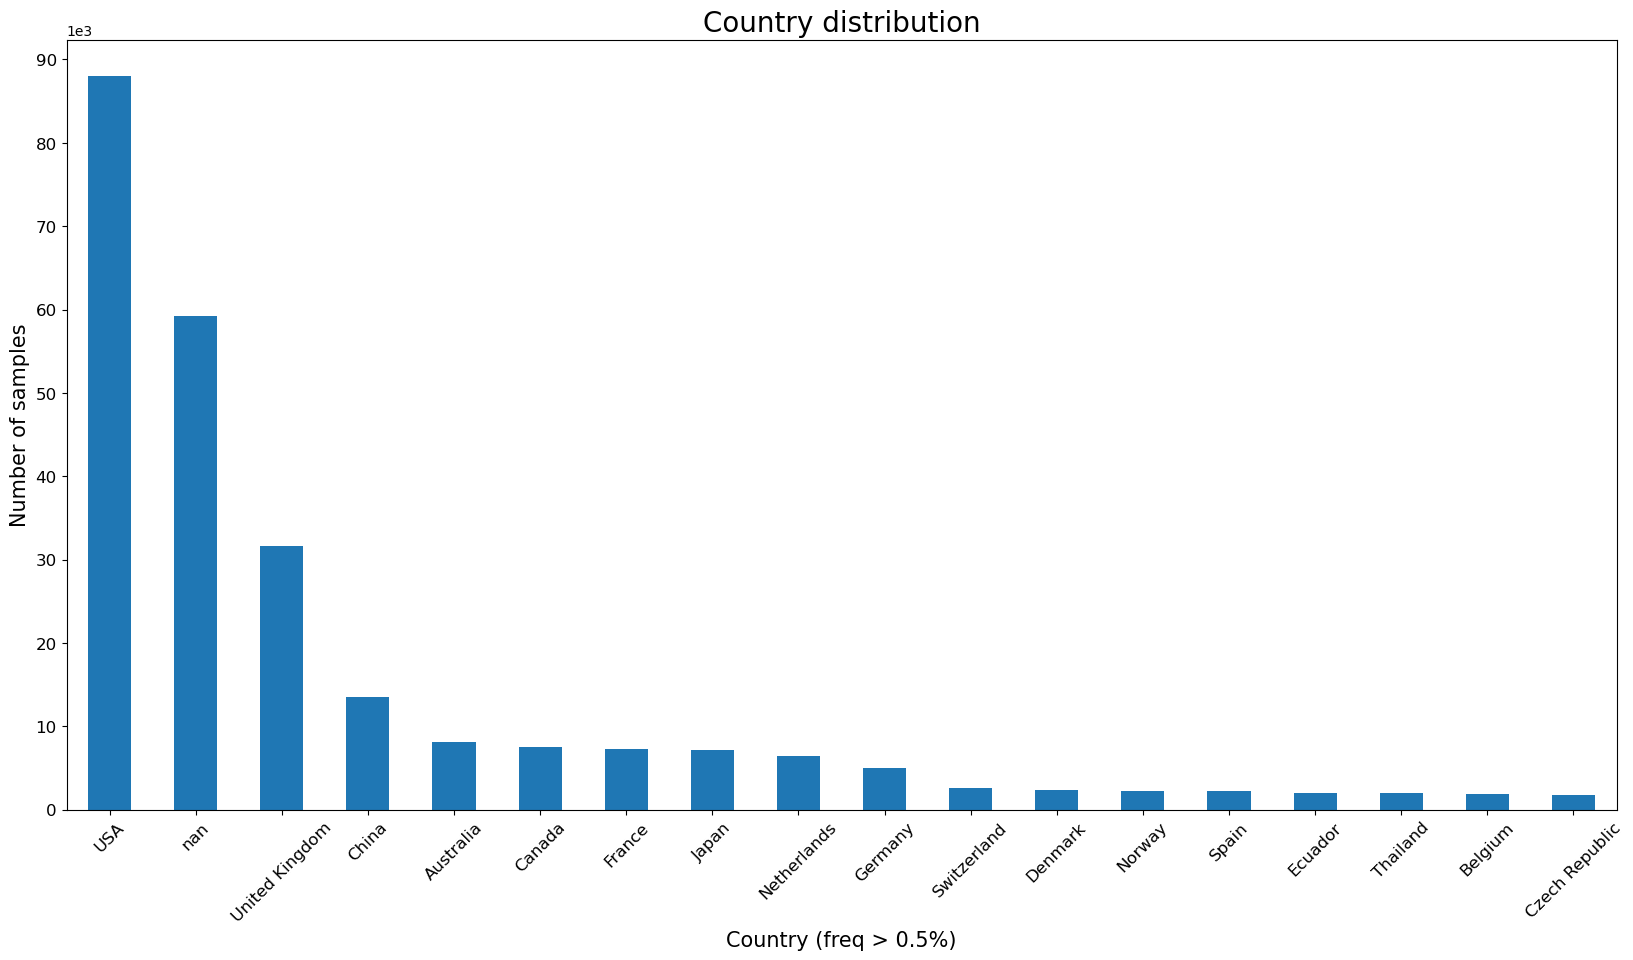

In [11]:
percentage_threshold = 0.005
frequncy_threshold = int(num_samples * percentage_threshold)
country_counts = df_geno['country'].value_counts(dropna=False)
df_country_filtered = country_counts[country_counts > frequncy_threshold]
print(f"Number of unique countries: {df_geno['country'].nunique():,}")
print(f"Number of countries with frequency > {percentage_threshold:.1%}: {df_country_filtered.shape[0]}")
print(f"Share of unknown samples: ({country_counts[np.nan]/num_geno_samples:.2%})")

ax = df_country_filtered.plot(
    kind='bar', figsize=(20, 10), fontsize=12, rot=45
)
# change yticks to scientific notation
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.set_yticks(np.arange(0, 91e3, 10e3))
ax.set_title('Country distribution', fontsize=20)
ax.set_xlabel(f'Country (freq > {percentage_threshold:.1%})', fontsize=15)
ax.set_ylabel('Number of samples', fontsize=15)
ax.figure.savefig('results/country_distr_filtered.png', bbox_inches='tight', dpi=300)

**Collection_date**

Group **collection date** into years and change name to 'year' 

Alternative NaN: 'missing'  
Most common format is YYYY-MM-DD  
In cases of YYYY/YYYY, we take the first year

In [12]:
alternative_nan = ['missing']
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].replace(alternative_nan, np.nan)
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].str.split('-').str[0]
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].str.split('/').str[0]
df_geno.rename(columns={'collection_date': 'year'}, inplace=True)

Filter years earlier than XXXX

In [13]:
def filter_years(df, threshold_year):
    print("Dropping samples before threshold_year", threshold_year)
    # get indices of samples before threshold_year, allows us to keep NaN values
    indices = df[df['year'].astype(float) <= threshold_year].index
    num_before = len(indices)
    # drop samples before threshold_year
    df.drop(indices, inplace=True)
    print(f"Number of samples before {threshold_year}: {num_before:,} ({num_before/num_geno_samples:.2%})")
    return df

threshold_year = 1900
df_geno = filter_years(df_geno, threshold_year)

Dropping samples before threshold_year 1900
Number of samples before 1900: 113 (0.04%)


Investigate distributions

Number of unique years: 90
Number of years with frequency > 0.1%: 27
Number of unknown samples 92,339 (32.86%)
Earliest year: 1911
Latest year: 2023


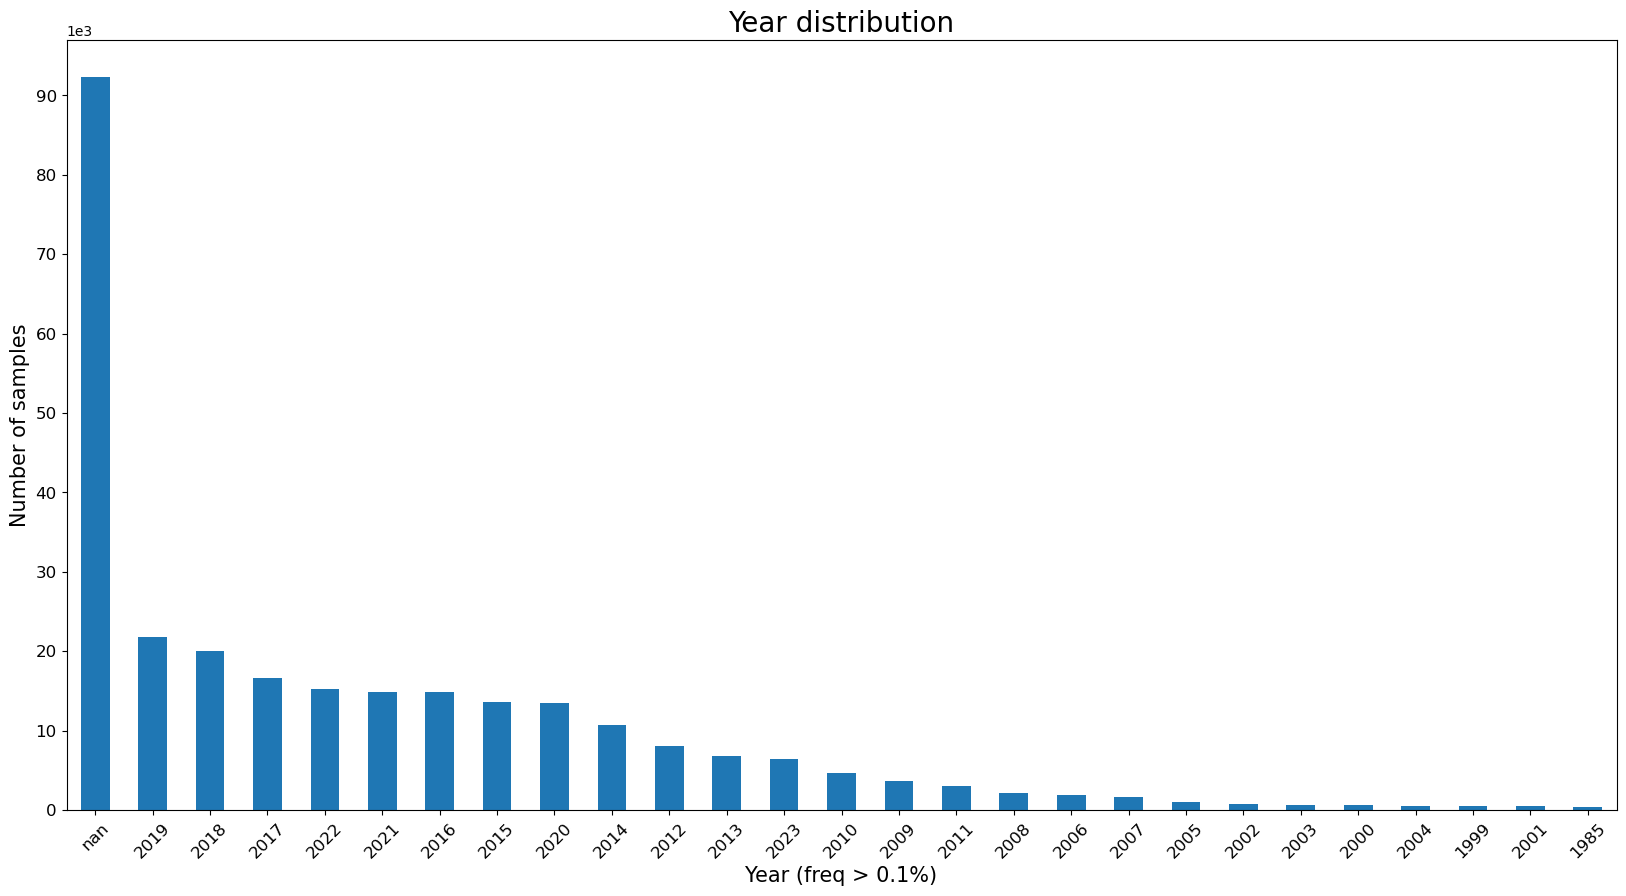

In [14]:
percentage_threshold = 0.001
frequncy_threshold = int(num_samples * percentage_threshold)
year_counts = df_geno['year'].value_counts(dropna=False)
df_year_filtered = year_counts[year_counts > frequncy_threshold]
print(f"Number of unique years: {df_geno['year'].nunique():,}")
print(f"Number of years with frequency > {percentage_threshold:.1%}: {df_year_filtered.shape[0]}")
print(f"Number of unknown samples {year_counts[np.nan]:,} ({year_counts[np.nan]/num_geno_samples:.2%})")

df_geno_notnan = df_geno[df_geno['year'].notnull()].astype({'year': 'int32'})
print(f"Earliest year: {df_geno_notnan['year'].min()}")
print(f"Latest year: {df_geno_notnan['year'].max()}")

ax = df_year_filtered.plot(
    kind='bar', figsize=(20, 10), fontsize=12, rot=45
)
# change yticks to scientific notation
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.set_yticks(np.arange(0, 91e3, 10e3))
ax.set_title('Year distribution', fontsize=20)
ax.set_xlabel(f'Year (freq > {percentage_threshold:.1%})', fontsize=15)
ax.set_ylabel('Number of samples', fontsize=15)
ax.figure.savefig('results/year_distr_filtered.png', bbox_inches='tight', dpi=300)

**AMR_genotypes_core**

In [15]:
# df_geno = df_explore[df_explore['AMR_genotypes_core'].notnull()]
# df_geno = df_geno[dataset_columns]
df_geno.rename(columns={'AMR_genotypes_core': 'genotypes'}, inplace=True)

Begin by making the column into a list of strings

In [16]:
df_geno.loc[:,'genotypes'] = df_geno['genotypes'].str.split(',')
df_geno['genotypes'].head(n=10)

1                      [aadA1, sul1, tet(A)]
4     [aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]
6       [cyaA_S352T=POINT, uhpT_E350Q=POINT]
8                         [parE_D475E=POINT]
9                         [uhpT_E350Q=POINT]
12                 [parC_A56T=POINT, tet(A)]
14                        [parE_I355T=POINT]
16    [aph(3'')-Ib, aph(6)-Id, sul2, tet(B)]
19          [aph(3'')-Ib, aph(6)-Id, tet(B)]
20          [aph(3'')-Ib, aph(6)-Id, tet(B)]
Name: genotypes, dtype: object

In [17]:
# Create column for number of (unique) genotypes
df_geno['num_genotypes'] = df_geno['genotypes'].apply(lambda x: len(set(x)))
df_geno.head() 

,year,country,genotypes,num_genotypes
1,NaN,USA,"[aadA1, sul1, tet(A)]",3
4,NaN,USA,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]",4
6,NaN,Sweden,"[cyaA_S352T=POINT, uhpT_E350Q=POINT]",2
8,NaN,USA,[parE_D475E=POINT],1
9,NaN,USA,[uhpT_E350Q=POINT],1


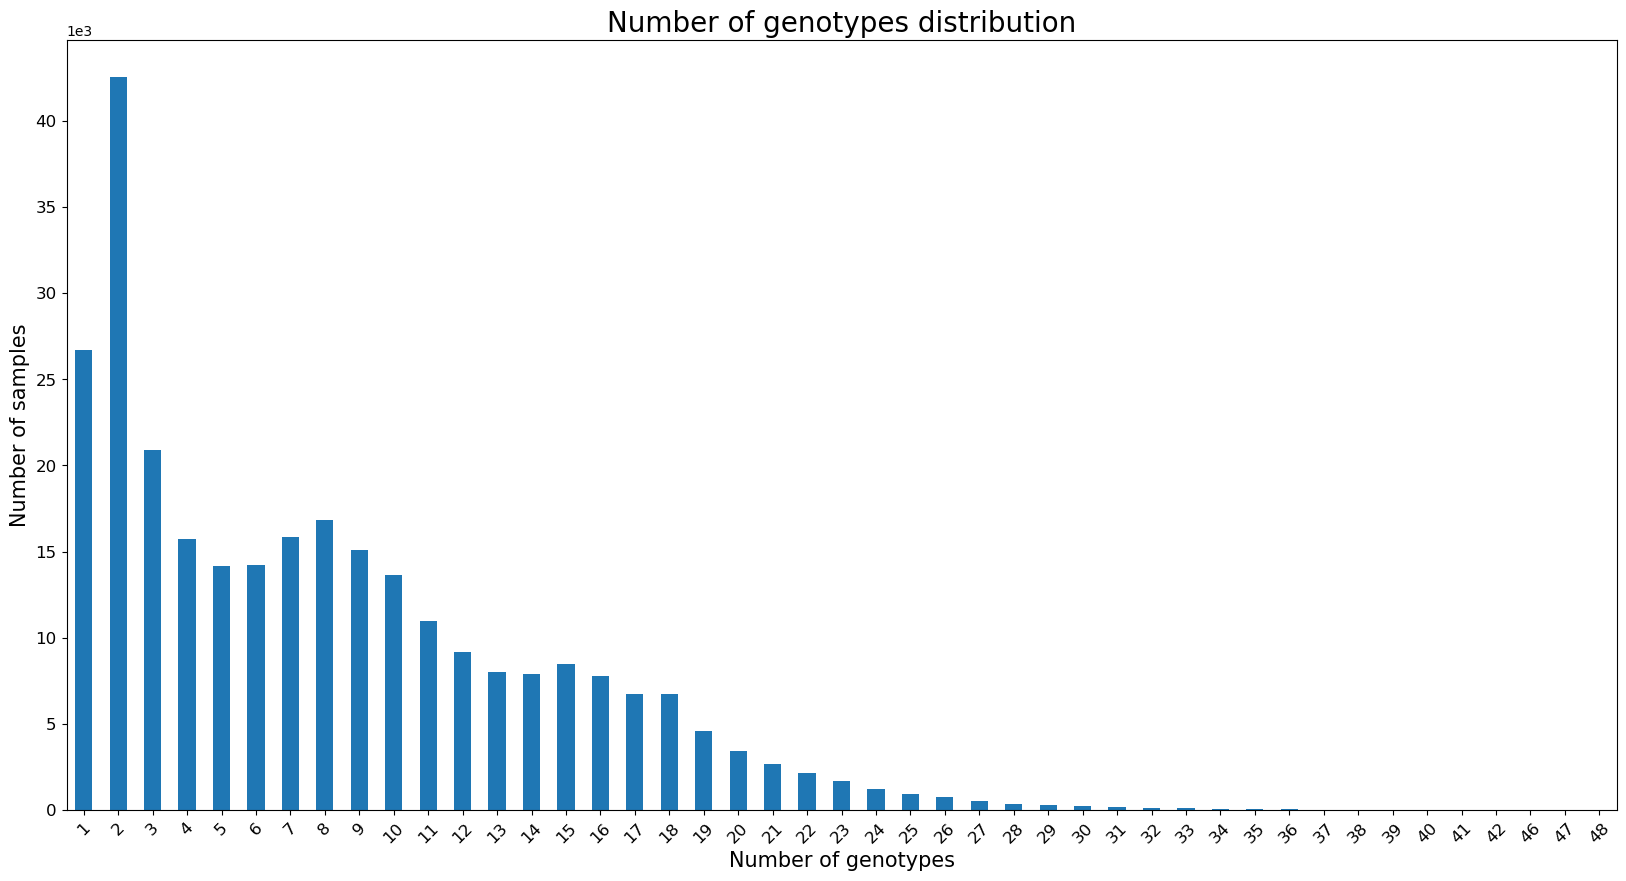

In [18]:
num_gene_counts = df_geno['num_genotypes'].value_counts().sort_index()
# plot distribution of number of genotypes
ax = num_gene_counts.plot(
    kind='bar', figsize=(20, 10), fontsize=12, rot=45
)
ax.set_title('Number of genotypes distribution', fontsize=20)
ax.set_xlabel('Number of genotypes', fontsize=15)
ax.set_ylabel('Number of samples', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.figure.savefig('results/num_genotypes_distr.png', bbox_inches='tight', dpi=300)

Filter samples with too many genes

In [19]:
def filter_gene_counts(df, threshold_num):
    print(f"Dropping samples with more than {threshold_num} genotypes")
    # get indices of samples with more than threshold_num genotypes
    indices = df[df['num_genotypes'] > threshold_num].index
    num_above = len(indices)
    # drop samples with more than threshold_num genotypes
    df.drop(indices, inplace=True)
    print(f"Number of samples with more than {threshold_num} genotypes: {num_above:,}")
    return df

df_geno = filter_gene_counts(df_geno, 35)

Dropping samples with more than 35 genotypes
Number of samples with more than 35 genotypes: 138


Add column with number of point mutations

In [20]:
df_geno['num_point_mutations'] = df_geno['genotypes'].apply(lambda x: len([i for i in x if '=POINT' in i]))

In [21]:
df_geno.head()

,year,country,genotypes,num_genotypes,num_point_mutations
1,NaN,USA,"[aadA1, sul1, tet(A)]",3,0
4,NaN,USA,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]",4,0
6,NaN,Sweden,"[cyaA_S352T=POINT, uhpT_E350Q=POINT]",2,2
8,NaN,USA,[parE_D475E=POINT],1,1
9,NaN,USA,[uhpT_E350Q=POINT],1,1


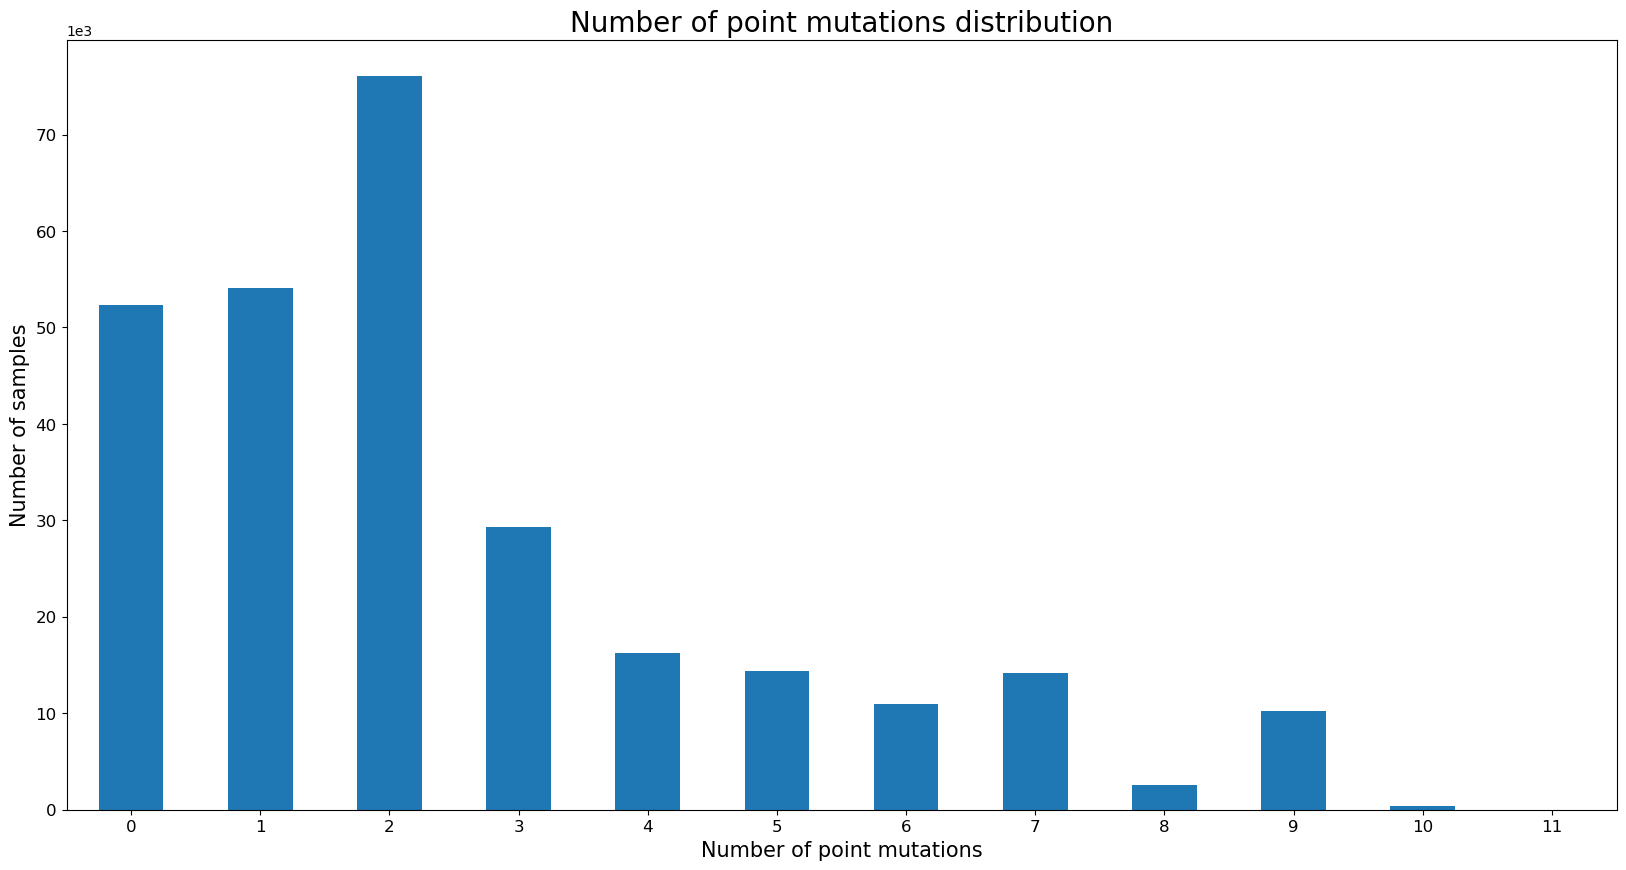

In [22]:
num_pm_counts = df_geno['num_point_mutations'].value_counts().sort_index()
# plot distribution of number of genotypes
ax = num_pm_counts.plot(
    kind='bar', figsize=(20, 10), fontsize=12, rot=0
)
ax.set_title('Number of point mutations distribution', fontsize=20)
ax.set_xlabel('Number of point mutations', fontsize=15)
ax.set_ylabel('Number of samples', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.figure.savefig('results/num_pm_distr.png', bbox_inches='tight', dpi=300)

In [23]:
num_unique_genes = len(set(chain(*df_geno['genotypes'])))
print(f"Number of unique genes: {num_unique_genes:,}")

Number of unique genes: 1,441


Feature to remove variants, e.g. where there are dashes

In [24]:
def remove_genotype_info(df, char_to_split: str, view_duplicate_info: bool=False):
    print(f"Splitting genotypes by '{char_to_split}', removing it and everything after it")
    old_genotypes = df['genotypes'].copy() # save old genotypes for later
    df['genotypes'] = df['genotypes'].apply(lambda x: [i.split(char_to_split)[0] for i in x])
    
    if view_duplicate_info:
        # count number of samples which now have duplicate genotypes
        num_duplicates = df['genotypes'].apply(lambda x: len(x) - len(set(x))).sum()
        df['num_duplicates'] = df['genotypes'].apply(lambda x: len(x) - len(set(x)))
        print(f"Number of duplicate genotype instances: {num_duplicates:,}")
        print(f"Number of samples with duplicate genotypes: {df[df['num_duplicates'] > 0].shape[0]:,}")
        print(f"Maximum number of duplicates in a sample: {df['num_duplicates'].max()}")
        index_max_duplicates = df['num_duplicates'].idxmax()
        print("Genes in sample with the most duplicates:")
        print(*old_genotypes[index_max_duplicates], sep="\n") # uncomment to see the genotypes with the most duplicates
        # remove duplicates
        df['genotypes'] = df['genotypes'].apply(lambda x: list(set(x)))
        df.drop(columns=['num_duplicates'], inplace=True)
    
    return df

In [25]:
remove_extra_genotype_info = False
if remove_extra_genotype_info:
    df_geno = remove_genotype_info(df_geno, '-', view_duplicate_info=True)
    print(f"Number of unique genes without extra info: {len(set(chain(*df_geno['genotypes']))):,}")

In [26]:
df_geno.head(n=10)

,year,country,genotypes,num_genotypes,num_point_mutations
1,NaN,USA,"[aadA1, sul1, tet(A)]",3,0
4,NaN,USA,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]",4,0
6,NaN,Sweden,"[cyaA_S352T=POINT, uhpT_E350Q=POINT]",2,2
8,NaN,USA,[parE_D475E=POINT],1,1
9,NaN,USA,[uhpT_E350Q=POINT],1,1
12,NaN,USA,"[parC_A56T=POINT, tet(A)]",2,1
14,NaN,Sweden,[parE_I355T=POINT],1,1
16,NaN,Indonesia,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(B)]",4,0
19,NaN,USA,"[aph(3'')-Ib, aph(6)-Id, tet(B)]",3,0
20,NaN,Canada,"[aph(3'')-Ib, aph(6)-Id, tet(B)]",3,0


Check for cases where info is too limited

In [27]:
print(f"Number of samples with only one genotype: {df_geno[df_geno['num_genotypes'] == 1].shape[0]:,}")
print(f"Number of samples with one genotype and max one of (country, year): {df_geno[(df_geno['num_genotypes'] == 1) & ((df_geno['country'].isnull()) | (df_geno['year'].isnull()))].shape[0]:,}")
print(f"Number of samples with one genotype and no other info (country, year): {df_geno[(df_geno['num_genotypes'] == 1) & (df_geno['country'].isnull()) & (df_geno['year'].isnull())].shape[0]:,}")

Number of samples with only one genotype: 26,711
Number of samples with one genotype and max one of (country, year): 10,842
Number of samples with one genotype and no other info (country, year): 4,163


Exclude cases where there is *only* one genotype and **no other info**

In [28]:
indices = df_geno[(df_geno['num_genotypes'] == 1) & (df_geno['country'].isnull()) & (df_geno['year'].isnull())].index
print(f"Number of samples with one genotype and no other info (country, year): {len(indices):,}")
df_geno.drop(indices, inplace=True)

Number of samples with one genotype and no other info (country, year): 4,163


Write processed genotype data to .csv

In [29]:
path = 'data/NCBI/genotype_parsed.pkl'
df_geno.to_pickle(path)

Count gene occurences

In [30]:
# get all unique genotypes
unique_genotypes = set(chain(*df_geno['genotypes']))
print(f"Number of unique genotypes: {len(unique_genotypes):,}")
counter = Counter(chain(*df_geno['genotypes']))
print(counter.most_common(10))
frequncy_threshold = 5
print(f"Number of genotypes with frequency > {frequncy_threshold}: {len([i for i in counter.values() if i > frequncy_threshold]):,}")

Number of unique genotypes: 1,438
[('glpT_E448K=POINT', 163038), ('sul2', 111102), ('aph(6)-Id', 101661), ("aph(3'')-Ib", 100628), ('tet(A)', 95901), ('gyrA_S83L=POINT', 92229), ('blaTEM-1', 91381), ('sul1', 71220), ('parC_S80I=POINT', 66862), ('pmrB_Y358N=POINT', 66654)]
Number of genotypes with frequency > 5: 759


### TEMPORARY: Preparing dataset for MLM task

In [31]:
import os
from pathlib import Path

import numpy as np
import torch
import pandas as pd
import typing

from tqdm import tqdm
from torch.utils.data import Dataset
from torchtext.vocab import vocab
from collections import Counter

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# set the base directory
# base_dir = Path(os.path.abspath('')).parent
# os.chdir(base_dir)
# print("base directory:", base_dir)

Class

In [35]:
class GenotypeDataset(Dataset):
    CLS = '[CLS]'
    # SEP = '[SEP]'
    PAD = '[PAD]'
    UNK = '[UNK]'
    MASK = '[MASK]'
    SPECIAL_TOKENS = [CLS, PAD, MASK, UNK]
    
    # df column names
    INDICES_MASKED = 'indices_masked'
    TARGET_INDICES = 'target_indices'
    TOKEN_MASK = 'token_mask'
    # if original text is included
    ORIGINAL_SENTENCE = 'original_sentence'
    MASKED_SENTENCE = 'masked_sentence'
    
    
    def __init__(self,
                 path: Path = None,
                 include_original: bool = False,
                 save_vocab: bool = True,
                 ):
        assert path is not None, "Provide a data path"
        
        self.ds = pd.read_pickle(path)
        self.num_samples = self.ds.shape[0]
        self.counter = Counter()
        self.sequences = list()
        self.vocab = None
        
        self._create_vocabulary()

    
    def __len__(self):
        return len(self.ds)
    
    
    def _create_vocabulary(self):
        print("Constructing vocabulary...")
        
        year = self.ds['year'].astype('Int16')
        # year_range = [str(p)[:-12] for p in pd.date_range(start=str(year.min()), end=(year.max()), freq='M')] # for monthly
        year_range = range(year.min(), year.max()+1)
        self.counter.update([str(y) for y in year_range]) # make sure all years are included in the vocab
        
        # replace missing values with PAD token -> will not be included in vocabulary or in self-attention
        self.ds.fillna(self.PAD, inplace=True)
        # replace missing values with [NA] token -> will be included in vocabulary and in self-attention
        # NA = '[NA]' # not available, missing values
        # self.ds.fillna(NA, inplace=True)
        
        # tokens += self.ds['country'].unique().tolist()
        # tokens += list(set(chain(*self.ds['genotypes']))) # unique genotypes
        
        # update counter
        self.counter.update(list(chain(*self.ds['genotypes'])))
        self.counter.update(self.ds[self.ds['year'] != 'PAD]']['year'].tolist()) # count tokens that are not [PAD] (missing values)
        self.counter.update(self.ds[self.ds['country'] != 'PAD]']['country'].tolist())
        
        # for i in range(self.num_samples):
        #     full_sequence = [self.ds['year'].iloc[i], self.ds['country'].iloc[i]] + self.ds['genotypes'].iloc[i]
        #     filtered_sequence = [token for token in full_sequence if token != self.PAD] 
        #     # print(full_sequence, "\n", filtered_sequence) if i == 19 else None # print example
        #     self.counter.update(filtered_sequence)
        #     self.sequences.append(full_sequence)
        
        self.vocab = vocab(self.counter, specials=self.SPECIAL_TOKENS)
        self.vocab_size = len(self.vocab)
        self.vocab.set_default_index(self.vocab[self.UNK])
    
    def mask_dataset(self, mask_prob = 0.15):
        # masking
        # RoBERTa: 80% -> [MASK], 10% -> original token, 10% -> random token
        genotype_sequences = self.ds['genotypes'].tolist()
        masked_sequences = list()
        target_indices = list()
        token_masks = list()
        indices_masked = list()

        special_tokens = [0, 1, 2, 3, 4]

        for seq in genotype_sequences:
            print(seq)
            target_indices.append(self.vocab.lookup_indices(seq)) 
            seq_len = len(seq)
            token_mask = [False] * seq_len
            for i in range(seq_len):
                if np.random.rand() < mask_prob:
                    r = np.random.rand()
                    if r < 0.8: 
                        seq[i] = ['MASK']
                    elif r < 0.9:
                        j = np.random.randint(len(special_tokens), self.ds.vocab_size) # select random token, excluding specials
                        seq[i] = self.vocab.lookup_token(j)
                    # else: do nothing, since r > 0.9 and we keep the same token
                    token_mask[i] = True 
            masked_sequences.append(seq)
            print(seq)
            indices_masked.append(self.vocab.lookup_indices(seq)) 
            token_masks.append(token_mask)

Test

In [36]:
path = 'data/NCBI/genotype_parsed.pkl'
dataset = GenotypeDataset(path=path)

Constructing vocabulary...


In [ ]:
dataset.mask_dataset()

: 

In [ ]:
path = 'data/NCBI/genotype_parsed.pkl'
dataset = GenotypeDataset(path=path)
ds = dataset.ds
ds.head()

Constructing vocabulary...


,year,country,genotypes,num_genotypes,num_point_mutations
1,[PAD],USA,"[aadA1, sul1, tet(A)]",3,0
4,[PAD],USA,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]",4,0
6,[PAD],Sweden,"[cyaA_S352T=POINT, uhpT_E350Q=POINT]",2,2
8,[PAD],USA,[parE_D475E=POINT],1,1
9,[PAD],USA,[uhpT_E350Q=POINT],1,1


In [ ]:
print("20 most common tokens:")
print(*dataset.counter.most_common()[:35], sep="\n")

20 most common tokens:
('glpT_E448K=POINT', 163038)
('sul2', 111102)
('aph(6)-Id', 101661)
("aph(3'')-Ib", 100628)
('tet(A)', 95901)
('gyrA_S83L=POINT', 92229)
('blaTEM-1', 91381)
('USA', 87977)
('sul1', 71220)
('parC_S80I=POINT', 66862)
('pmrB_Y358N=POINT', 66654)
('aadA1', 65379)
('tet(B)', 58898)
('mph(A)', 58175)
('gyrA_D87N=POINT', 57434)
('dfrA1', 48441)
('uhpT_E350Q=POINT', 46737)
('dfrA17', 43583)
('aadA5', 39813)
('sat2', 38806)
('cyaA_S352T=POINT', 36547)
('blaCTX-M-15', 34008)
('United Kingdom', 31593)
('blaOXA-1', 31506)
('pmrB_E123D=POINT', 29751)
('catA1', 26873)
('aadA2', 24954)
('floR', 24642)
('ptsI_V25I=POINT', 23148)
('qnrS1', 22340)
('parE_I529L=POINT', 22013)
('2019', 21815)
("aph(3')-Ia", 21516)
('dfrA12', 20202)
('2018', 20032)


In [ ]:
print(f"Number of unique tokens: {len(dataset.counter):,}")
print(f"Number of tokens with frequency > 100: {len([i for i in dataset.counter.values() if i > 100]):,}")
print(f"Number of tokens with frequency < 10: {len([i for i in dataset.counter.values() if i < 10]):,}")
print(f"Number of tokens with frequency < 5: {len([i for i in dataset.counter.values() if i < 5]):,}")
print(f"Number of tokens that only occur once: {len([i for i in dataset.counter.values() if i < 2]):,}")
print("Tokens that only occur once:", *[token for (token, count) in dataset.counter.items() if count < 2], sep="\n")

Number of unique tokens: 1,704
Number of tokens with frequency > 100: 412
Number of tokens with frequency < 10: 895
Number of tokens with frequency < 5: 709
Number of tokens that only occur once: 391
Tokens that only occur once:
1912
1913
1914
1915
1916
1918
1919
1920
1921
1923
1924
1925
1926
1927
1928
1932
1933
1935
1939
1940
1941
1942
1962
aadA11=PARTIAL_END_OF_CONTIG
16S_A964G=POINT
16S_A1055G=POINT
tufA_Q125R=POINT
blaTEM-105
aac(2')-IIa=PARTIAL
qnrE
rmtB3
vanS-B=PARTIAL_END_OF_CONTIG
aadA6=PARTIAL
blaCTX-M-166
hugA
dfrA16=PARTIAL
blaOXA-50
fosA7.2
blaTEM-209
16S_G527T=POINT
qnrS12
rpoB_R529C=POINT
blaTEM-154
fosA2
blaCMY-136
mcr-1.4
fabI_G93S=POINT
aac(3)-I=PARTIAL_END_OF_CONTIG
blaCMY-111
blaR1=MISTRANSLATION
ant(3'')-IIc=PARTIAL_END_OF_CONTIG
blaROB
mcr-5=PARTIAL_END_OF_CONTIG
catB6
rmtD1
blaLAT
blaCMY-44
blaTEM-4
blaTEM-5
blaTEM-7
blaTEM-8
blaCMY-24
blaTEM-9
aac(3)-IIa=PARTIAL_END_OF_CONTIG
blaIMI=MISTRANSLATION
qepA10
pmrB_L14Q=POINT
blaCMY-33
pmrB_E121Q=POINT
vanZ-A=PARTIAL_E

In [ ]:
# # masking
# # RoBERTa: 80% -> [MASK], 10% -> original token, 10% -> random token
# genotype_sequences = ds['genotypes'].tolist()
# mask_prob = 0.15
# sequence = genotype_sequences[0]
# masked_sequences = list()
# target_indices = list()
# token_masks = list()
# indices_masked = list()

# special_tokens = [0, 1, 2, 3, 4]

# for seq in genotype_sequences:
#     print(seq)
#     target_indices.append(dataset.vocab.lookup_indices(seq)) 
#     seq_len = len(seq)
#     token_mask = [False] * seq_len
#     for i, token in enumerate(seq):
#         if np.random.rand() < mask_prob:
#             r = np.random.rand()
#             if r < 0.8: 
#                 seq[i] = ['MASK']
#             elif r < 0.9:
#                 j = np.random.randint(len(special_tokens), dataset.vocab_size) # select random token, excluding specials
#                 seq[i] = dataset.vocab.lookup_token(j)
#             # else: do nothing, since r > 0.9 and we keep the same token
#             token_mask[i] = True 
#     # masked_sequences.append(seq)
#     print(seq)
#     indices_masked.append(dataset.vocab.lookup_indices(seq)) 
#     # token_masks.append(token_mask)

: 

In [ ]:
print(genotype_sequences[:5])
print(masked_sequences[:5])
print(target_indices[:5])
print(indices_masked[:5])
print(token_masks[:5])

[['aadA1', ['MASK'], 'tet(A)'], [['MASK'], 'aph(6)-Id', 'sul2', 'tet(A)'], ['cyaA_S352T=POINT', 'uhpT_E350Q=POINT'], [['MASK']], ['uhpT_E350Q=POINT']]
[]
[[117, 118, 119], [120, 121, 122, 119], [123, 124], [125], [124]]
[]
[]


In [ ]:
# masking
def mask_sequence(sequence: list[str], mask_token: str, mask_prob: float, vocab: vocab):
    len_seq = len(sequence)
    masked_sequence = list()
    target_indices = list()
    indices_masked = list()
    token_mask = [False] * len_seq
    
    for i, token in enumerate(sequence):
        # mask token with probability mask_prob
        if np.random.rand() < mask_prob:
            masked_sequence.append(mask_token)
            target_indices.append(i)
            indices_masked.append(vocab[token])
        else:
            masked_sequence.append(token)
    return masked_sequence, target_indices, indices_masked

mask_prob = 0.15
masked_sequences = list()
target_indices = list()
indices_masked = list()


       